# Test functions with local files

**Testing `HidroCLVariable`**

In [1]:
import pandas as pd

import hidrocl
import hidrocl_paths as hcl

In [2]:
print(hidrocl.__version__)
print(hidrocl.__uri__)
print(hidrocl.__summary__)

0.0.8
https://github.com/aldotapia/HidroCL-OOP


In [3]:
print(hidrocl.HidroCLVariable)

<class 'hidrocl.variables.HidroCLVariable'>


In [ ]:
temp = hidrocl.HidroCLVariable("ndvi",
                               "./testfiles/veg_o_modis_ndvi_mean_b_d16_p0d.csv",
                               "./testfiles/veg_o_modis_ndvi_mean_pc.csv")

print(ndvi)

In [ ]:
print(ndvi.observations)

In [ ]:
print(ndvi.plot_valid_data_all())

In [ ]:
print(ndvi.catchment_names[80:90])

In [1]:
import rioxarray as rioxr

In [41]:
import xarray

In [2]:
file = '/Users/aldotapia/hidrocl_test/era5-land_20000101.nc'
var = 't2m'

In [56]:
da = xarray.open_dataset(file, mask_and_scale=True)

In [64]:
da.round()

<xarray.Dataset>
Dimensions:    (longitude: 101, latitude: 401, time: 24)
Coordinates:
  * longitude  (longitude) float32 -75.0 -74.9 -74.8 -74.7 ... -65.2 -65.1 -65.0
  * latitude   (latitude) float32 -15.0 -15.1 -15.2 -15.3 ... -54.8 -54.9 -55.0
  * time       (time) datetime64[ns] 2000-01-01 ... 2000-01-01T23:00:00
Data variables: (12/13)
    t2m        (time, latitude, longitude) float32 293.0 292.0 290.0 ... nan nan
    pev        (time, latitude, longitude) float32 -0.0 -0.0 -0.0 ... nan nan
    asn        (time, latitude, longitude) float32 1.0 1.0 1.0 ... nan nan nan
    snowc      (time, latitude, longitude) float32 0.0 0.0 0.0 ... nan nan nan
    rsn        (time, latitude, longitude) float32 100.0 100.0 100.0 ... nan nan
    sde        (time, latitude, longitude) float32 0.0 0.0 0.0 ... nan nan nan
    ...         ...
    e          (time, latitude, longitude) float32 -0.0 -0.0 -0.0 ... nan nan
    tp         (time, latitude, longitude) float32 0.0 0.0 0.0 ... nan nan nan
    swvl1      (time, latitude, longitude) float32 0.0 0.0 0.0 ... nan nan nan
    swvl2      (time, latitude, longitude) float32 0.0 0.0 0.0 ... nan nan nan
    swvl3      (time, latitude, longitude) float32 0.0 0.0 0.0 ... nan nan nan
    swvl4      (time, latitude, longitude) float32 0.0 0.0 0.0 ... nan nan nan
Attributes:
    Conventions:  CF-1.6
    history:      2022-09-26 15:35:27 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [69]:
((da['t2m'].mean(dim='time')-273.15)*10).rio.to_raster('/Users/aldotapia/hidrocl_test/era5test.tiff', compress="LZW")

In [28]:
da = rioxr.open_rasterio(file)

In [29]:
da = da[var]

In [37]:
add_offset = da.attrs.get('add_offset')
scale_factor = da.attrs.get('scale_factor')

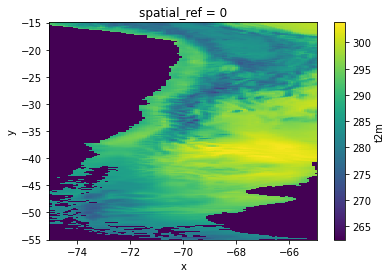

In [40]:
(da[:] * scale_factor + add_offset).mean(dim='time')

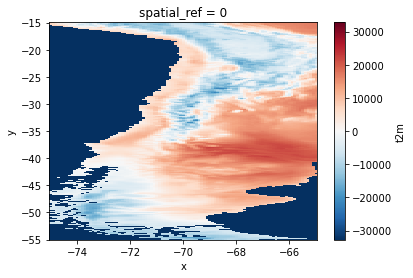

In [20]:
#da.sel(y=slice(-55, -15),x=slice(-75,-65))
da.mean(dim='time').plot()

In [22]:
da = da.mean(dim='time')
da.rio.write_nodata(-32767, inplace=True)

<xarray.DataArray 't2m' (y: 401, x: 101)>
array([[  8031.20833333,   6640.58333333,   4516.16666667, ...,
         16467.375     ,  16522.79166667,  16687.08333333],
       [  7623.66666667,   6490.45833333,   4433.91666667, ...,
         16455.125     ,  16530.        ,  16719.54166667],
       [  7210.5       ,   6252.5       ,   4608.83333333, ...,
         16451.5       ,  16610.04166667,  16782.125     ],
       ...,
       [-32767.        , -32767.        , -32767.        , ...,
        -32767.        , -32767.        , -32767.        ],
       [-32767.        , -32767.        , -32767.        , ...,
        -32767.        , -32767.        , -32767.        ],
       [-32767.        , -32767.        , -32767.        , ...,
        -32767.        , -32767.        , -32767.        ]])
Coordinates:
  * y            (y) float64 -15.0 -15.1 -15.2 -15.3 ... -54.7 -54.8 -54.9 -55.0
  * x            (x) float64 -75.0 -74.9 -74.8 -74.7 ... -65.3 -65.2 -65.1 -65.0
    spatial_ref  int64 0
Attributes:
    _FillValue:  -32767.0

In [27]:
da

<xarray.Dataset>
Dimensions:      (y: 401, x: 101, time: 24)
Coordinates:
  * y            (y) float64 -15.0 -15.1 -15.2 -15.3 ... -54.7 -54.8 -54.9 -55.0
  * x            (x) float64 -75.0 -74.9 -74.8 -74.7 ... -65.3 -65.2 -65.1 -65.0
  * time         (time) object 2000-01-01 00:00:00 ... 2000-01-01 23:00:00
    spatial_ref  int64 0
Data variables: (12/13)
    t2m          (time, y, x) int16 ...
    swvl1        (time, y, x) int16 ...
    swvl2        (time, y, x) int16 ...
    swvl3        (time, y, x) int16 ...
    swvl4        (time, y, x) int16 ...
    pev          (time, y, x) int16 ...
    ...           ...
    snowc        (time, y, x) int16 ...
    rsn          (time, y, x) int16 ...
    sde          (time, y, x) int16 ...
    sd           (time, y, x) int16 ...
    e            (time, y, x) int16 ...
    tp           (time, y, x) int16 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-09-26 15:35:27 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [25]:
da.rio.to_raster('/Users/aldotapia/hidrocl_test/era5test.tiff', dtype="uint8", compress="LZW")

/Users/aldotapia/miniforge3/envs/hidrocl/lib/python3.10/site-packages/rioxarray/raster_writer.py:110: UserWarning: The nodata value (-32767.0) has been automatically changed to (1) to match the dtype of the data.
  warnings.warn(


In [73]:
[value.split("_")[1].split(".")[0] for value in product_files]

['20000101']

In [76]:
from datetime import datetime


In [77]:
datetime.strptime('20000101', '%Y%m%d').strftime('%Y-%m-%d')

'2000-01-01'

In [81]:
def load_era5(file, var, reducer='mean'):
    """
    Load .nc files from ERA5 product

    Args:
        file (str): file path
        var (str): variable to extract
        reducer (str): reducer to use

    Returns:
        xarray.DataArray: xarray.DataArray with the variable
    """


    da = xarray.open_dataset(file, mask_and_scale=True)
    da = da[var]
    match reducer:
        case 'mean':
            da = da.mean(dim='time')
        case 'sum':
            da = da.sum(dim='time')
        case _:
            raise ValueError("Reducer not supported")
    match var:
        case 't2m':
            da = da - 273.15
        case _:
            pass
    return da



In [94]:
load_era5(file, "e", "sum").rio.to_raster('/Users/aldotapia/hidrocl_test/era5testet.tiff', compress="LZW")

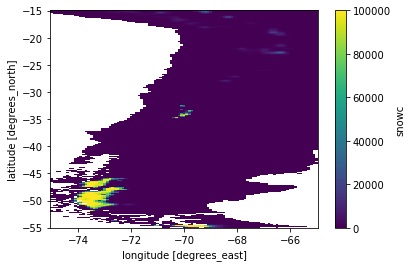

In [111]:
(load_era5(file, "snowc", "mean")*1000).plot.pcolormesh()

In [110]:
import cartopy.ccrs

ModuleNotFoundError: No module named 'cartopy'

In [21]:
import hidrocl
import hidrocl_paths as hcl
import geopandas as gpd
print(hidrocl.__version__)

0.0.9


In [22]:
temp = hidrocl.HidroCLVariable("temp",
                               hcl.tmp_o_era5_tmp_mean_b_d14_p0d,
                               hcl.tmp_o_era5_tmp_mean_b_pc)

pp = hidrocl.HidroCLVariable("pp",
                             hcl.pp_o_era5_pp_mean_b_d_p0d,
                             hcl.pp_o_era5_pp_mean_b_pc)

eto = hidrocl.HidroCLVariable("eto",
                              hcl.et_o_era5_eto_cum_b_d_p0d,
                              hcl.et_o_gldas_eta_cum_b_pc)

et = hidrocl.HidroCLVariable("et",
                             hcl.et_o_era5_et_cum_b_d_p0d,
                             hcl.et_o_era5_et_cum_b_pc)

sca = hidrocl.HidroCLVariable("sca",
                              hcl.snow_o_era5_sca_mean_b_d_p0d,
                              hcl.snow_o_era5_sca_mean_b_pc)

sna = hidrocl.HidroCLVariable("sna",
                              hcl.snow_o_era5_sna_mean_b_d_p0d,
                              hcl.snow_o_era5_sna_mean_b_pc)

snr = hidrocl.HidroCLVariable("snr",
                              hcl.snow_o_era5_snr_mean_b_d_p0d,
                              hcl.snow_o_era5_snr_mean_b_pc)

snd = hidrocl.HidroCLVariable("snd",
                              hcl.snow_o_era5_snd_mean_b_d_p0d,
                              hcl.snow_o_era5_snd_mean_b_pc)

sm = hidrocl.HidroCLVariable("sm",
                             hcl.sm_o_era5_sm_mean_b_d_p0d,
                             hcl.sm_o_era5_sm_mean_b_pc)

Database not found. Please, add catchment names before creating the database
Please, check the database for getting the IDs processed
Could not load dataframe, perhaps the database has not been created yet
Database not found. Please, add catchment names before creating the database
Database not found. Please, add catchment names before creating the database
Please, check the database for getting the IDs processed
Could not load dataframe, perhaps the database has not been created yet
Database not found. Please, add catchment names before creating the database
Database not found. Please, add catchment names before creating the database
Please, check the database for getting the IDs processed
Could not load dataframe, perhaps the database has not been created yet
Database found, using /private/nfs2/pcdatabases/observed/et_o_gldas_eta_cum_b_pc.csv
Database not found. Please, add catchment names before creating the database
Please, check the database for getting the IDs processed
Could not

In [23]:
v = gpd.read_file(hcl.hidrocl_wgs84)
catchment_names = v.gauge_id.tolist()

In [24]:
pp.catchment_names = catchment_names
temp.catchment_names = catchment_names
eto.catchment_names = catchment_names
et.catchment_names = catchment_names
sca.catchment_names = catchment_names
sna.catchment_names = catchment_names
snr.catchment_names = catchment_names
snd.catchment_names = catchment_names
sm.catchment_names = catchment_names

In [30]:
pp.checkdatabase()
pp.checkpcdatabase()
temp.checkdatabase()
temp.checkpcdatabase()
eto.checkdatabase()
eto.checkpcdatabase()
et.checkdatabase()
et.checkpcdatabase()
sca.checkdatabase()
sca.checkpcdatabase()
sna.checkdatabase()
sna.checkpcdatabase()
snr.checkdatabase()
snr.checkpcdatabase()
snd.checkdatabase()
snd.checkpcdatabase()
sm.checkdatabase()
sm.checkpcdatabase()

Database found, using /private/nfs2/databases/observed/pp_o_era5_pp_mean_b_d_p0d.csv
Database found, using /private/nfs2/pcdatabases/observed/pp_o_era5_pp_mean_b_pc.csv
Database found, using /private/nfs2/databases/observed/tmp_o_era5_tmp_mean_b_d14_p0d.csv
Database found, using /private/nfs2/pcdatabases/observed/tmp_o_era5_tmp_mean_b_pc.csv
Database found, using /private/nfs2/databases/observed/et_o_era5_eto_cum_b_d_p0d.csv
Database found, using /private/nfs2/pcdatabases/observed/et_o_gldas_eta_cum_b_pc.csv
Database found, using /private/nfs2/databases/observed/et_o_era5_et_cum_b_d_p0d.csv
Database found, using /private/nfs2/pcdatabases/observed/et_o_era5_et_cum_b_pc.csv
Database found, using /private/nfs2/databases/observed/snow_o_era5_sca_mean_b_d_p0d.csv
Database found, using /private/nfs2/pcdatabases/observed/snow_o_era5_sca_b_mean_pc.csv
Database found, using /private/nfs2/databases/observed/snow_o_era5_sna_mean_b_d_p0d.csv
Database found, using /private/nfs2/pcdatabases/observed

In [31]:
era5 = hidrocl.Era5_land(pp, temp, et, eto, sca, sna, snr, snd, sm,
                         pp_log=hcl.log_pp_o_era5_pp_mean,
                         temp_log=hcl.log_tmp_o_era5_tmp_mean,
                         et_log=hcl.log_et_o_era5_et_cum,
                         pet_log=hcl.log_et_o_era5_eto_cum,
                         snw_log=hcl.log_snow_o_era5_sca,
                         snwa_log=hcl.log_snow_o_era5_sna,
                         snwdn_log=hcl.log_snow_o_era5_snr,
                         snwdt_log=hcl.log_snow_o_era5_snd,
                         soilm_log=hcl.log_sm_o_era5_sm_mean,
                         product_path=hcl.era5_land_hourly_path,
                         vector_path=hcl.hidrocl_wgs84)

In [27]:
era5.run_extraction(limit=1)

Processing scene 20000101 for temp_era5
Time elapsed for 20000101: 13 seconds
Processing scene 20000101 for pp_era5
Time elapsed for 20000101: 8 seconds
Processing scene 20000101 for et_era5
Time elapsed for 20000101: 8 seconds
Processing scene 20000101 for pet_era5
Time elapsed for 20000101: 8 seconds
Processing scene 20000101 for snw_era5
Time elapsed for 20000101: 8 seconds
Processing scene 20000101 for snwa_era5
Time elapsed for 20000101: 8 seconds
Processing scene 20000101 for snwdn_era5
Time elapsed for 20000101: 8 seconds
Processing scene 20000101 for snwdt_era5
Time elapsed for 20000101: 8 seconds
Processing scene 20000101 for soilm_era5
Time elapsed for 20000101: 8 seconds


In [32]:
era5.temp.indatabase

[20000101]

In [6]:
era5.scenes_to_process[0]

'20000101'

In [7]:
era5.common_elements

[]

In [9]:
era5.common_elements

[]

In [10]:
import hidrocl.products.tools as t

In [11]:
era5.temp.checkdatabase()
era5.pp.checkdatabase()
era5.et.checkdatabase()
era5.pet.checkdatabase()
era5.snw.checkdatabase()
era5.snwa.checkdatabase()
era5.snwdn.checkdatabase()
era5.snwdt.checkdatabase()
era5.soilm.checkdatabase()

Database found, using /private/nfs2/databases/observed/pp_o_era5_pp_mean_b_d_p0d.csv
Database found, using /private/nfs2/databases/observed/tmp_o_era5_tmp_mean_b_d14_p0d.csv
Database found, using /private/nfs2/databases/observed/et_o_era5_et_cum_b_d_p0d.csv
Database found, using /private/nfs2/databases/observed/et_o_era5_eto_cum_b_d_p0d.csv
Database found, using /private/nfs2/databases/observed/snow_o_era5_sca_mean_b_d_p0d.csv
Database found, using /private/nfs2/databases/observed/snow_o_era5_sna_mean_b_d_p0d.csv
Database found, using /private/nfs2/databases/observed/snow_o_era5_snr_mean_b_d_p0d.csv
Database found, using /private/nfs2/databases/observed/snow_o_era5_snd_mean_b_d_p0d.csv
Database found, using /private/nfs2/databases/observed/sm_o_era5_sm_mean_b_d_p0d.csv


In [12]:
common_elements = t.compare_indatabase(era5.temp.indatabase,
                                       era5.pp.indatabase,
                                       era5.et.indatabase,
                                       era5.pet.indatabase,
                                       era5.snw.indatabase,
                                       era5.snwa.indatabase,
                                       era5.snwdn.indatabase,
                                       era5.snwdt.indatabase,
                                       era5.soilm.indatabase)

In [13]:
common_elements

[20000101]

In [14]:
scenes_to_process = t.get_scenes_out_of_db(era5.complete_scenes, common_elements, "era5")

In [16]:
scenes_to_process[0]

'20000102'

In [20]:
era5.complete_scenes[0] in era5.temp.indatabase

[20000101, 20000101]

In [3]:
import xarray

In [4]:
da = xarray.open_dataset('/Users/aldotapia/Downloads/CSR_GRACE_GRACE-FO_RL06_Mascons_all-corrections_v02.nc')

In [1]:
from netCDF4 import Dataset, num2date

In [4]:
Dataset('/Users/aldotapia/Downloads/GSU-2_2002095-2002120_GRAC_UTCSR_B---_0600', mode='r')

OSError: [Errno -51] NetCDF: Unknown file format: b'/Users/aldotapia/Downloads/GSU-2_2002095-2002120_GRAC_UTCSR_B---_0600'

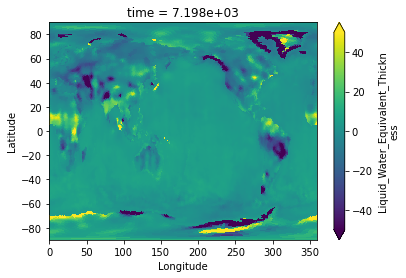

In [22]:
da['lwe_thickness'][200].plot(vmin=-50,vmax=50)

In [14]:
da['lwe_thickness'].time

<xarray.DataArray 'time' (time: 212)>
array([ 107. ,  129.5,  227.5, ..., 7471. , 7501.5, 7532.5], dtype=float32)
Coordinates:
  * time     (time) float32 107.0 129.5 227.5 ... 7.471e+03 7.502e+03 7.532e+03
Attributes:
    bounds:         time_bounds
    calendar:       gregorian
    axis:           T
    standard_name:  Time
    long_name:      Time
    Units:          days since 2002-01-01T00:00:00Z

In [15]:
da = xarray.open_dataset('/Users/aldotapia/Downloads/GSU-2_2002095-2002120_GRAC_UTCSR_B---_0600.nc')

ValueError: did not find a match in any of xarray's currently installed IO backends ['netcdf4', 'h5netcdf', 'scipy', 'rasterio']. Consider explicitly selecting one of the installed engines via the ``engine`` parameter, or installing additional IO dependencies, see:
http://xarray.pydata.org/en/stable/getting-started-guide/installing.html
http://xarray.pydata.org/en/stable/user-guide/io.html

In [2]:
import hidrocl
import xarray
import numpy as np
from array import array

In [3]:
fpath = '/private/nfs2/observed/PERSIANN/rgccs1d22237.bin'

In [4]:
test = hidrocl.products.extractions.load_persiann(fpath)

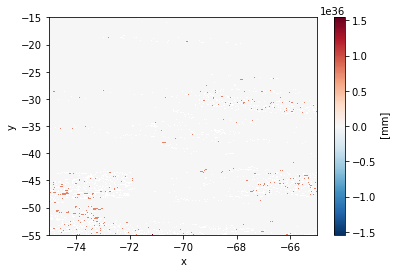

In [16]:
test.plot.pcolormesh()

In [5]:
da = open(fpath, 'rb')

In [6]:
nlon = 9000
nlat = 3000
flon = 0.02
slon = 0.04
llon = 359.99
flat = 59.98  # N
slat = -0.04
llat = -59.99  # S

In [7]:
lon = np.arange(flon, llon, slon)
lat = np.arange(flat, llat, slat)

In [8]:
bytesize = 4
overhead = 0
recl = (nlon * nlat + overhead) * bytesize

In [9]:
tmp = array('f', da.read(recl))

In [10]:
data = np.reshape(tmp, (nlat, nlon))

In [16]:
tmp[10]

-359130132905984

In [ ]:


data[data < -1000] = np.nan

persiann = xarray.DataArray(data,
                            coords={'lat': lat,
                                    'lon': lon},
                            dims=['lat', 'lon'],
                            attrs=dict(
                                description='Precipitation',
                                units='mm'
                            ))

persiann.coords['lon'] = (persiann.coords['lon'] + 180) % 360 - 180
return persiann.sortby(persiann.lon)\
    .sortby(persiann.lat).sel(lat=slice(-55, -15), lon=slice(-75, -65))\
    .rename({'lon': 'x', 'lat': 'y'})

In [30]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
from struct import unpack
from osgeo import gdal
from osgeo import osr

# inputfile
BinaryFile = fpath # '3B42_daily.2009.05.31.7.bin'. Make sure you adjust the location.

# open binary file
f = open(BinaryFile, 'rb')

# set file dimensions
xs = 9000
ys = 3000

# set number of bytes in file
NumbytesFile = xs * ys

# number of columns in row
NumElementxRecord = -xs

# create empty array to put data in
myarr = []

# loop trough the binary file row by row
for PositionByte in range(NumbytesFile,0, NumElementxRecord):

        Record = ''

        # the dataset starts at 0 degrees, use 720 to convert to -180 degrees
        for c in range (PositionByte-720, PositionByte, 1):
                f.seek(c * 4)
                DataElement = unpack('>f', f.read(4))
                Record = Record  + str('%.2f' % DataElement + ' ')

        # 0 - 180 degrees
        for c in range (PositionByte-1440 , PositionByte-720, 1):
                f.seek(c * 4)
                DataElement = unpack('>f', f.read(4))
                Record = Record  + str('%.2f' % DataElement + ' ')

        # add data to array
        myarr.append(Record[:-1].split(' '))

# close binary file
f.close()

# Array to numpy float
myarr = np.array(myarr).astype('float')

# mirror array
myarr = myarr[::-1]

# Array to numpy float
myarr = np.array(myarr).astype('float')

# set values &lt; 0 to nodata
myarr[myarr < 0] = -9999

# mirror array
myarr = myarr[::-1]

In [23]:
xarray.

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [2.66, 2.85, 5.25, ..., 0.17, 0.96, 2.66],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]])

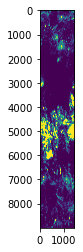

In [29]:
plt.imshow(myarr)
plt.clim(0,10)
plt.show()

## Prueba con GFS

In [14]:
import os
import xarray
import pandas as pd
import numpy as np

In [2]:
fpath = '/private/nfs2/forecasted/2006/2006101000/GFS0.5_gh_isothermZero_instant_2006101000.nc'

In [18]:
os.listdir('/private/nfs2/forecasted/',)

['2011',
 '2006',
 '2008',
 '2010',
 '2009',
 '2012',
 '2013',
 '2014',
 '2015',
 '2018',
 '2016',
 '2017',
 '2019',
 '2020',
 '2021',
 '2022',
 '2007']

In [20]:
for root, subdirs, files in os.walk('/private/nfs2/forecasted/'):
    print(files)

[]
[]
['GFS0.5_u10_heightAboveGround_instant_2011010300.nc', 'GFS0.5_prate_surface_avg_2011010300.nc', 'GFS0.5_r2_heightAboveGround_instant_2011010300.nc', 'GFS0.5_t2m_heightAboveGround_instant_2011010300.nc', 'GFS0.5_v10_heightAboveGround_instant_2011010300.nc', 'GFS0.5_gh_isothermZero_instant_2011010300.nc']
['GFS0.5_v10_heightAboveGround_instant_2011010100.nc', 'GFS0.5_r2_heightAboveGround_instant_2011010100.nc', 'GFS0.5_t2m_heightAboveGround_instant_2011010100.nc', 'GFS0.5_gh_isothermZero_instant_2011010100.nc', 'GFS0.5_prate_surface_avg_2011010100.nc', 'GFS0.5_u10_heightAboveGround_instant_2011010100.nc']
['GFS0.5_u10_heightAboveGround_instant_2011010500.nc', 'GFS0.5_prate_surface_avg_2011010500.nc', 'GFS0.5_r2_heightAboveGround_instant_2011010500.nc', 'GFS0.5_v10_heightAboveGround_instant_2011010500.nc', 'GFS0.5_t2m_heightAboveGround_instant_2011010500.nc', 'GFS0.5_gh_isothermZero_instant_2011010500.nc']
['GFS0.5_u10_heightAboveGround_instant_2011010200.nc', 'GFS0.5_prate_surface

KeyboardInterrupt: 

In [23]:
files

['GFS0.5_u10_heightAboveGround_instant_2014102800.nc',
 'GFS0.5_prate_surface_avg_2014102800.nc',
 'GFS0.5_r2_heightAboveGround_instant_2014102800.nc',
 'GFS0.5_v10_heightAboveGround_instant_2014102800.nc',
 'GFS0.5_t2m_heightAboveGround_instant_2014102800.nc',
 'GFS0.5_gh_isothermZero_instant_2014102800.nc']

In [24]:
subdirs

[]

In [48]:
from pathlib import Path

for path in Path('/private/nfs2/forecasted/').rglob('*r2*.nc'):
    print(path.name)

GFS0.5_r2_heightAboveGround_instant_2011010300.nc
GFS0.5_r2_heightAboveGround_instant_2011010100.nc
GFS0.5_r2_heightAboveGround_instant_2011010500.nc
GFS0.5_r2_heightAboveGround_instant_2011010200.nc
GFS0.5_r2_heightAboveGround_instant_2011010400.nc
GFS0.5_r2_heightAboveGround_instant_2011010700.nc
GFS0.5_r2_heightAboveGround_instant_2011010900.nc
GFS0.5_r2_heightAboveGround_instant_2011010800.nc
GFS0.5_r2_heightAboveGround_instant_2011011000.nc
GFS0.5_r2_heightAboveGround_instant_2011010600.nc
GFS0.5_r2_heightAboveGround_instant_2011011100.nc
GFS0.5_r2_heightAboveGround_instant_2011011200.nc
GFS0.5_r2_heightAboveGround_instant_2011011300.nc
GFS0.5_r2_heightAboveGround_instant_2011011400.nc
GFS0.5_r2_heightAboveGround_instant_2011011500.nc
GFS0.5_r2_heightAboveGround_instant_2011011600.nc
GFS0.5_r2_heightAboveGround_instant_2011011800.nc
GFS0.5_r2_heightAboveGround_instant_2011011900.nc
GFS0.5_r2_heightAboveGround_instant_2011011700.nc
GFS0.5_r2_heightAboveGround_instant_2011012000.nc


KeyboardInterrupt: 

In [57]:
 product_files = ['2022/2022010100/GFS0.5_r2_heightAboveGround_instant_2022010100.nc']
[value.split("_")[-1].split('.')[0] for value in product_files]

['2022010100']

In [59]:
from datetime import datetime

In [64]:
datetime.strptime('2022010100', '%Y%m%d%H').strftime('%Y-%m-%d')

'2022-01-01'

In [54]:
variable = 'r2'

In [55]:
[str(value.relative_to('/private/nfs2/forecasted/')) for value in Path('/private/nfs2/forecasted/2022/2022010100').rglob('*'+variable+'*.nc')]

['2022/2022010100/GFS0.5_r2_heightAboveGround_instant_2022010100.nc']

In [65]:
test = xarray.open_dataset(fpath, mask_and_scale=True)

In [66]:
test

<xarray.Dataset>
Dimensions:       (valid_time: 41, latitude: 97, longitude: 33)
Coordinates:
    time          datetime64[ns] ...
    isothermZero  float64 ...
  * latitude      (latitude) float64 -13.0 -13.5 -14.0 ... -60.0 -60.5 -61.0
  * longitude     (longitude) float64 281.0 281.5 282.0 ... 296.0 296.5 297.0
  * valid_time    (valid_time) datetime64[ns] 2006-10-10 ... 2006-10-15
Data variables:
    gh            (valid_time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    history:                 2022-11-08T15:24 GRIB to CDM+CF via cfgrib-0.9.1...

In [67]:
print(test.valid_time.to_dict)

<bound method DataArray.to_dict of <xarray.DataArray 'valid_time' (valid_time: 41)>
array(['2006-10-10T00:00:00.000000000', '2006-10-10T03:00:00.000000000',
       '2006-10-10T06:00:00.000000000', '2006-10-10T09:00:00.000000000',
       '2006-10-10T12:00:00.000000000', '2006-10-10T15:00:00.000000000',
       '2006-10-10T18:00:00.000000000', '2006-10-10T21:00:00.000000000',
       '2006-10-11T00:00:00.000000000', '2006-10-11T03:00:00.000000000',
       '2006-10-11T06:00:00.000000000', '2006-10-11T09:00:00.000000000',
       '2006-10-11T12:00:00.000000000', '2006-10-11T15:00:00.000000000',
       '2006-10-11T18:00:00.000000000', '2006-10-11T21:00:00.000000000',
       '2006-10-12T00:00:00.000000000', '2006-10-12T03:00:00.000000000',
       '2006-10-12T06:00:00.000000000', '2006-10-12T09:00:00.000000000',
       '2006-10-12T12:00:00.000000000', '2006-10-12T15:00:00.000000000',
       '2006-10-12T18:00:00.000000000', '2006-10-12T21:00:00.000000000',
       '2006-10-13T00:00:00.000000000', 

In [68]:
day = 4

In [69]:
test2=test['gh'].sel(valid_time = slice(test.time+pd.to_timedelta(24*day, unit='H'), test.time+pd.to_timedelta(24*day + 23, unit='H')))

In [70]:
test2.valid_time

<xarray.DataArray 'valid_time' (valid_time: 8)>
array(['2006-10-14T00:00:00.000000000', '2006-10-14T03:00:00.000000000',
       '2006-10-14T06:00:00.000000000', '2006-10-14T09:00:00.000000000',
       '2006-10-14T12:00:00.000000000', '2006-10-14T15:00:00.000000000',
       '2006-10-14T18:00:00.000000000', '2006-10-14T21:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
    time          datetime64[ns] 2006-10-10
    isothermZero  float64 0.0
  * valid_time    (valid_time) datetime64[ns] 2006-10-14 ... 2006-10-14T21:00:00
Attributes:
    standard_name:  time
    long_name:      time

In [71]:
test2 = test2.transpose('valid_time','latitude', 'longitude')

In [72]:
test2.coords['longitude'] = (test2.coords['longitude'] + 180) % 360 - 180

In [88]:
test2

<xarray.DataArray 'gh' (valid_time: 8, latitude: 97, longitude: 33)>
array([[[5154.1, 5142.8, ..., 5115.2, 5090.5],
        [5185.6, 5179. , ..., 5085.4, 5095.4],
        ...,
        [ 555.4,  612.9, ...,  700.8,  756.9],
        [ 575.9,  642.2, ...,  697.3,  754.5]],

       [[5233.1, 5244.9, ..., 5122.6, 5093.1],
        [5247.8, 5249.2, ..., 5087.4, 5053.5],
        ...,
        [ 422.4,  452.9, ...,  757.2,  744.5],
        [ 315.5,  347.5, ...,  736. ,  704.7]],

       ...,

       [[5226.9, 5223. , ..., 4987.2, 4981.5],
        [5159.1, 5166.9, ..., 5093.2, 5086.9],
        ...,
        [ 110. ,  114.7, ...,  675.1,  659.1],
        [ 113.4,  120.1, ...,  582.9,  560.6]],

       [[5170.5, 5173.6, ..., 5225.7, 5194.6],
        [5122.1, 5127.9, ..., 5252. , 5208.6],
        ...,
        [ 154.3,  165.4, ...,  695. ,  671.5],
        [ 142.6,  149.4, ...,  641.3,  604.5]]], dtype=float32)
Coordinates:
    time          datetime64[ns] 2006-10-10
    isothermZero  float64 0.0
  * latitude      (latitude) float64 -13.0 -13.5 -14.0 ... -60.0 -60.5 -61.0
  * longitude     (longitude) float64 -79.0 -78.5 -78.0 ... -64.0 -63.5 -63.0
  * valid_time    (valid_time) datetime64[ns] 2006-10-14 ... 2006-10-14T21:00:00
Attributes:
    GRIB_paramId:                             156
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      259920
    GRIB_typeOfLevel:                         isothermZero
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    GRIB_gridType:                            regular_ll
    GRIB_NV:                                  0
    GRIB_Nx:                                  720
    GRIB_Ny:                                  361
    GRIB_cfName:                              geopotential_height
    GRIB_cfVarName:                           gh
    GRIB_gridDefinitionDescription:           Latitude/longitude. Also called...
    GRIB_iDirectionIncrementInDegrees:        0.5
    GRIB_iScansNegatively:                    0
    GRIB_jDirectionIncrementInDegrees:        0.5
    GRIB_jPointsAreConsecutive:               0
    GRIB_jScansPositively:                    0
    GRIB_latitudeOfFirstGridPointInDegrees:   90.0
    GRIB_latitudeOfLastGridPointInDegrees:    -90.0
    GRIB_longitudeOfFirstGridPointInDegrees:  0.0
    GRIB_longitudeOfLastGridPointInDegrees:   359.5
    GRIB_missingValue:                        3.4028234663852886e+38
    GRIB_name:                                Geopotential height
    GRIB_shortName:                           gh
    GRIB_units:                               gpm
    long_name:                                Geopotential height
    units:                                    gpm
    standard_name:                            geopotential_height

In [73]:
def mean_datasets(dataset_list):
    """
    Function to get mean from xarray datasets

    Args:
        dataset_list (list): list of xarray datasets

    Returns:
        xarray.Dataset: xarray dataset with the mean of the datasets
    """
    template = dataset_list[0].copy()
    mean_values = np.mean([d.values for d in dataset_list], axis=0)
    template.values = mean_values
    return template

In [76]:
test3 = mean_datasets(test2)

In [80]:
test3

<xarray.DataArray 'gh' (latitude: 97, longitude: 33)>
array([[5155.8125 , 5155.2    , 5145.05   , ..., 5083.2124 , 5059.975  ,
        5038.9004 ],
       [5137.8506 , 5140.462  , 5138.55   , ..., 5120.375  , 5093.2754 ,
        5067.0376 ],
       [5127.2627 , 5128.975  , 5131.4746 , ..., 5169.9253 , 5134.025  ,
        5103.05   ],
       ...,
       [ 273.3125 ,  289.025  ,  306.3    , ...,  732.11255,  737.2875 ,
         737.8875 ],
       [ 240.11252,  256.32498,  274.625  , ...,  669.82495,  663.0375 ,
         656.4625 ],
       [ 202.5625 ,  218.1875 ,  232.575  , ...,  578.6625 ,  570.475  ,
         563.78754]], dtype=float32)
Coordinates:
    time          datetime64[ns] 2006-10-10
    isothermZero  float64 0.0
  * latitude      (latitude) float64 -13.0 -13.5 -14.0 ... -60.0 -60.5 -61.0
  * longitude     (longitude) float64 -79.0 -78.5 -78.0 ... -64.0 -63.5 -63.0
    valid_time    datetime64[ns] 2006-10-14
Attributes:
    GRIB_paramId:                             156
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      259920
    GRIB_typeOfLevel:                         isothermZero
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    GRIB_gridType:                            regular_ll
    GRIB_NV:                                  0
    GRIB_Nx:                                  720
    GRIB_Ny:                                  361
    GRIB_cfName:                              geopotential_height
    GRIB_cfVarName:                           gh
    GRIB_gridDefinitionDescription:           Latitude/longitude. Also called...
    GRIB_iDirectionIncrementInDegrees:        0.5
    GRIB_iScansNegatively:                    0
    GRIB_jDirectionIncrementInDegrees:        0.5
    GRIB_jPointsAreConsecutive:               0
    GRIB_jScansPositively:                    0
    GRIB_latitudeOfFirstGridPointInDegrees:   90.0
    GRIB_latitudeOfLastGridPointInDegrees:    -90.0
    GRIB_longitudeOfFirstGridPointInDegrees:  0.0
    GRIB_longitudeOfLastGridPointInDegrees:   359.5
    GRIB_missingValue:                        3.4028234663852886e+38
    GRIB_name:                                Geopotential height
    GRIB_shortName:                           gh
    GRIB_units:                               gpm
    long_name:                                Geopotential height
    units:                                    gpm
    standard_name:                            geopotential_height

In [83]:
import xarray as xr

In [89]:
test4 = xr.concat([test3,test3], dim = 'band')


In [141]:
test4.set_b

<xarray.DataArray 'band' (band: 2)>
array([0, 1])
Coordinates:
    time          datetime64[ns] 2006-10-10
    isothermZero  float64 0.0
    valid_time    datetime64[ns] 2006-10-14
Dimensions without coordinates: band

In [146]:
ds = xarray.Dataset()

In [147]:
for i in range(0,4):
    ds[f'banda{i}'] = test4

In [154]:
days = [0,2,3]
newdays = []

In [155]:
for i in range(0,5):
    if i in days:
        newdays.append(i)

In [163]:
(days.index(0) + 1) + len(days)

4

In [152]:
{i: name for i, name in enumerate([f'banda{val}' for val in days])}

{0: 'banda0', 1: 'banda2', 2: 'banda3'}

In [138]:
ds.rename({0:'banda1', 1:'banda2'}).rio.to_raster('/Users/aldotapia/hidrocl_test/test.tif')

ValueError: cannot rename 0 because it is not a variable or dimension in this dataset

In [124]:
ds.rio.to_raster('/Users/aldotapia/hidrocl_test/test.tif')

AttributeError: 'int' object has no attribute 'encode'

In [122]:
ds.rename({i + 1: name for i, name in enumerate([f'Variable{val}' for val in range(0,2)])})

ValueError: cannot rename 2 because it is not a variable or dimension in this dataset

In [118]:
ds.to_

<xarray.Dataset>
Dimensions:       (latitude: 97, longitude: 33)
Coordinates:
    time          datetime64[ns] 2006-10-10
    isothermZero  float64 0.0
  * latitude      (latitude) float64 -13.0 -13.5 -14.0 ... -60.0 -60.5 -61.0
  * longitude     (longitude) float64 -79.0 -78.5 -78.0 ... -64.0 -63.5 -63.0
    valid_time    datetime64[ns] 2006-10-14
Data variables:
    0             (latitude, longitude) float32 5.156e+03 5.155e+03 ... 563.8
    1             (latitude, longitude) float32 5.156e+03 5.155e+03 ... 563.8
Attributes: (12/29)
    GRIB_paramId:                             156
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      259920
    GRIB_typeOfLevel:                         isothermZero
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_name:                                Geopotential height
    GRIB_shortName:                           gh
    GRIB_units:                               gpm
    long_name:                                Geopotential height
    units:                                    gpm
    standard_name:                            geopotential_height

In [103]:
ds.attrs

{'GRIB_paramId': 156,
 'GRIB_dataType': 'fc',
 'GRIB_numberOfPoints': 259920,
 'GRIB_typeOfLevel': 'isothermZero',
 'GRIB_stepUnits': 1,
 'GRIB_stepType': 'instant',
 'GRIB_gridType': 'regular_ll',
 'GRIB_NV': 0,
 'GRIB_Nx': 720,
 'GRIB_Ny': 361,
 'GRIB_cfName': 'geopotential_height',
 'GRIB_cfVarName': 'gh',
 'GRIB_gridDefinitionDescription': 'Latitude/longitude. Also called equidistant cylindrical, or Plate Carree',
 'GRIB_iDirectionIncrementInDegrees': 0.5,
 'GRIB_iScansNegatively': 0,
 'GRIB_jDirectionIncrementInDegrees': 0.5,
 'GRIB_jPointsAreConsecutive': 0,
 'GRIB_jScansPositively': 0,
 'GRIB_latitudeOfFirstGridPointInDegrees': 90.0,
 'GRIB_latitudeOfLastGridPointInDegrees': -90.0,
 'GRIB_longitudeOfFirstGridPointInDegrees': 0.0,
 'GRIB_longitudeOfLastGridPointInDegrees': 359.5,
 'GRIB_missingValue': 3.4028234663852886e+38,
 'GRIB_name': 'Geopotential height',
 'GRIB_shortName': 'gh',
 'GRIB_units': 'gpm',
 'long_name': 'Geopotential height',
 'units': 'gpm',
 'standard_name': '

In [105]:
[f'Variable{val}' for val in range(0,4)]

['Variable0', 'Variable1', 'Variable2', 'Variable3']

In [106]:
{i + 1: name for i, name in enumerate([f'Variable{val}' for val in range(0,4)])}

{1: 'Variable0', 2: 'Variable1', 3: 'Variable2', 4: 'Variable3'}

In [1]:
import os
import rioxarray as rioxr

In [25]:
fpath = '/private/nfs2/observed/MCD15A2H'

In [27]:
raster_list = os.listdir(fpath)

In [28]:
raster_list

['MCD15A2H.A2004049.h11v11.006.2015086184054.hdf',
 'MCD15A2H.A2004049.h11v10.006.2015086190138.hdf',
 'MCD15A2H.A2004049.h11v12.006.2015086190020.hdf',
 'MCD15A2H.A2004049.h14v14.006.2015086190051.hdf',
 'MCD15A2H.A2004049.h12v12.006.2015086190048.hdf',
 'MCD15A2H.A2004049.h12v11.006.2015086190210.hdf',
 'MCD15A2H.A2004049.h12v13.006.2015086190026.hdf',
 'MCD15A2H.A2004049.h13v14.006.2015086184046.hdf',
 'MCD15A2H.A2004049.h13v13.006.2015086190034.hdf',
 'MCD15A2H.A2004065.h11v12.006.2015087084103.hdf',
 'MCD15A2H.A2004065.h11v11.006.2015087084116.hdf',
 'MCD15A2H.A2004065.h13v13.006.2015087084547.hdf',
 'MCD15A2H.A2004065.h11v10.006.2015087084135.hdf',
 'MCD15A2H.A2004065.h12v11.006.2015087084450.hdf',
 'MCD15A2H.A2004081.h14v14.006.2015087195551.hdf',
 'MCD15A2H.A2004081.h11v10.006.2015087193720.hdf',
 'MCD15A2H.A2002233.h11v11.006.2015150120938.hdf',
 'MCD15A2H.A2002233.h12v12.006.2015150121123.hdf',
 'MCD15A2H.A2002233.h13v14.006.2015150122110.hdf',
 'MCD15A2H.A2004081.h13v14.006.

In [31]:
files = [os.path.join(fpath,value) for value in raster_list]

In [53]:
def test_open_raster(raster_list):
    """
    Function test files with rioxarray

    :param raster_list: list with raster paths
    :return: None
    """

    if isinstance(raster_list, list):
        for raster in raster_list:
            with rioxr.open_rasterio(raster, masked=True) as src:
                pass
    else:
        with rioxr.open_rasterio(raster_list, masked=True) as src:
            pass

In [57]:
test_open_raster(files[0])

In [52]:
isinstance(files[1:10], list)

True

In [37]:
rioxr.open_rasterio(files[1])

<xarray.Dataset>
Dimensions:          (y: 2400, x: 2400, band: 1)
Coordinates:
  * y                (y) float64 -1.112e+06 -1.113e+06 ... -2.223e+06 -2.224e+06
  * x                (x) float64 -7.783e+06 -7.783e+06 ... -6.672e+06 -6.672e+06
  * band             (band) int64 1
    spatial_ref      int64 0
Data variables:
    Fpar_500m        (band, y, x) uint8 ...
    Lai_500m         (band, y, x) uint8 ...
    FparLai_QC       (band, y, x) uint8 ...
    FparExtra_QC     (band, y, x) uint8 ...
    FparStdDev_500m  (band, y, x) uint8 ...
    LaiStdDev_500m   (band, y, x) uint8 ...
Attributes: (12/81)
    ALGORITHMPACKAGEACCEPTANCEDATE:     10-01-2004
    ALGORITHMPACKAGEMATURITYCODE:       Normal
    ALGORITHMPACKAGENAME:               MCDPR_15A2
    ALGORITHMPACKAGEVERSION:            6
    ASSOCIATEDINSTRUMENTSHORTNAME.1:    MODIS
    ASSOCIATEDINSTRUMENTSHORTNAME.2:    MODIS
    ...                                 ...
    SYSTEMFILENAME:                     MYD15A1H.A2004056.h11v10.006.20150861...
    TileID:                             51011010
    UM_VERSION:                         U.MONTANA MODIS PGE34 Vers 5.0.4 Rev ...
    VERSIONID:                          6
    VERTICALTILENUMBER:                 10
    WESTBOUNDINGCOORDINATE:             -74.4924440657743

In [6]:
file = '/private/nfs2/observed/IMERG_GIS/3B-HHR-L.MS.MRG.3IMERG.20000608-S000000-E002959.0000.V06B.30min.tif'

In [22]:
file.split(".")[4].split("-")[0]

'20000608'

In [17]:
import hidrocl

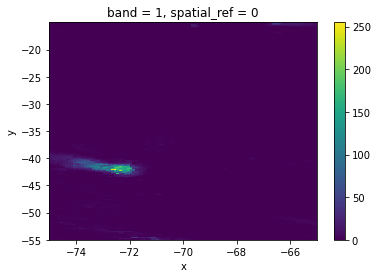

In [19]:
hidrocl.products.extractions.load_imerggis(file).plot()

In [10]:
test = rioxr.open_rasterio(file)

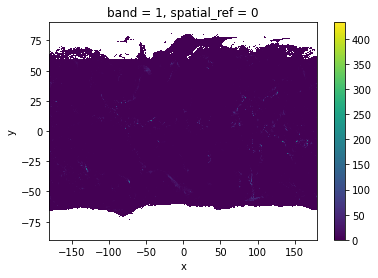

In [16]:
test.where(test != 29999)

In [79]:
test.sel(x=slice(-75, -65), y=slice(-15, -55)).rio.to_raster("/Users/aldotapia/hidrocl_test/imergegis.tif")

/Users/aldotapia/miniforge3/envs/hidrocl/lib/python3.10/site-packages/IPython/core/interactiveshell.py:2936: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return runner(coro)


In [9]:
test.values

array([[[29999, 29999, 29999, ..., 29999, 29999, 29999],
        [29999, 29999, 29999, ..., 29999, 29999, 29999],
        [29999, 29999, 29999, ..., 29999, 29999, 29999],
        ...,
        [29999, 29999, 29999, ..., 29999, 29999, 29999],
        [29999, 29999, 29999, ..., 29999, 29999, 29999],
        [29999, 29999, 29999, ..., 29999, 29999, 29999]]], dtype=uint16)

In [76]:
test

<xarray.DataArray (band: 1, y: 1800, x: 3600)>
[6480000 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -179.9 -179.8 -179.7 -179.6 ... 179.8 179.9 180.0
  * y            (y) float64 89.95 89.85 89.75 89.65 ... -89.75 -89.85 -89.95
    spatial_ref  int64 0

In [1]:
import hidrocl
import hidrocl_paths as hcl
import geopandas as gpd

In [2]:
v = gpd.read_file('/Users/aldotapia/hidrocl_test/polis.shp')

In [3]:
catchment_names = v.DESCCOMU.tolist()

In [4]:
catchment_names

['LA HIGUERA',
 'VICUÑA',
 'LA SERENA',
 'COQUIMBO',
 'PAIHUANO',
 'ANDACOLLO',
 'RIO HURTADO',
 'OVALLE',
 'MONTE PATRIA',
 'PUNITAQUI',
 'COMBARBALA',
 'CANELA',
 'ILLAPEL',
 'SALAMANCA',
 'LOS VILOS']

In [5]:
test = hidrocl.HidroCLVariable('test', '/Users/aldotapia/hidrocl_test/db.csv', '/Users/aldotapia/hidrocl_test/db2.csv')

Database found, using /Users/aldotapia/hidrocl_test/db.csv
Database found, using /Users/aldotapia/hidrocl_test/db2.csv


In [6]:
test.observations

,name_id,LA HIGUERA,VICUÑA,LA SERENA,COQUIMBO,PAIHUANO,ANDACOLLO,RIO HURTADO,OVALLE,MONTE PATRIA,PUNITAQUI,COMBARBALA,CANELA,ILLAPEL,SALAMANCA,LOS VILOS
date,,,,,,,,,,,,,,,,


In [7]:
test.catchment_names = catchment_names

In [8]:
test.checkdatabase()
test.checkpcdatabase()

Database found, using /Users/aldotapia/hidrocl_test/db.csv
Database found, using /Users/aldotapia/hidrocl_test/db2.csv


In [9]:
igis = hidrocl.ImergGIS(test, product_path=hcl.imerggis_path,
                        vector_path=hcl.hidrocl_wgs84,
                        pp_log='/Users/aldotapia/hidrocl_test/log.txt')

In [10]:
igis.run_extraction()

Processing scene 20000608 for imgis
Time elapsed for 20000608: 3 seconds
Processing scene 20000609 for imgis
Time elapsed for 20000609: 3 seconds
Processing scene 20000610 for imgis
Time elapsed for 20000610: 3 seconds
Processing scene 20000611 for imgis
Time elapsed for 20000611: 3 seconds
Processing scene 20000612 for imgis
Time elapsed for 20000612: 3 seconds
Processing scene 20000613 for imgis
Time elapsed for 20000613: 3 seconds
Processing scene 20000614 for imgis
Time elapsed for 20000614: 3 seconds
Processing scene 20000615 for imgis
Time elapsed for 20000615: 3 seconds
Processing scene 20000616 for imgis
Time elapsed for 20000616: 3 seconds
Processing scene 20000617 for imgis
Time elapsed for 20000617: 3 seconds
Processing scene 20000618 for imgis
Time elapsed for 20000618: 3 seconds
Processing scene 20000619 for imgis
Time elapsed for 20000619: 3 seconds
Processing scene 20000620 for imgis
Time elapsed for 20000620: 3 seconds
Processing scene 20000621 for imgis
Time elapsed fo

Warning 1: TIFFFetchNormalTag:IO error during reading of "DocumentName"; tag ignored
Warning 1: TIFFFetchNormalTag:IO error during reading of "ImageDescription"; tag ignored
Warning 1: TIFFFetchNormalTag:IO error during reading of "Software"; tag ignored
Warning 1: TIFFFetchNormalTag:IO error during reading of "DateTime"; tag ignored
Warning 1: TIFFFetchNormalTag:IO error during reading of "GeoPixelScale"; tag ignored
Warning 1: TIFFFetchNormalTag:IO error during reading of "GeoTiePoints"; tag ignored
Warning 1: TIFFFetchNormalTag:IO error during reading of "GeoKeyDirectory"; tag ignored
Warning 1: TIFFFetchNormalTag:IO error during reading of "GeoDoubleParams"; tag ignored


Error in scene 20000908
Processing scene 20000909 for imgis
Error in scene 20000909
Processing scene 20000910 for imgis
Error in scene 20000910
Processing scene 20000911 for imgis
Error in scene 20000911
Processing scene 20000912 for imgis
Error in scene 20000912
Processing scene 20000913 for imgis
Error in scene 20000913
Processing scene 20000914 for imgis
Error in scene 20000914
Processing scene 20000915 for imgis
Error in scene 20000915
Processing scene 20000916 for imgis
Error in scene 20000916
Processing scene 20000917 for imgis
Error in scene 20000917
Processing scene 20000918 for imgis
Error in scene 20000918
Processing scene 20000919 for imgis
Error in scene 20000919
Processing scene 20000920 for imgis
Error in scene 20000920
Processing scene 20000921 for imgis
Error in scene 20000921
Processing scene 20000922 for imgis
Error in scene 20000922
Processing scene 20000923 for imgis
Error in scene 20000923
Processing scene 20000924 for imgis
Error in scene 20000924
Processing scene

Warning 1: TIFFFetchNormalTag:IO error during reading of "DocumentName"; tag ignored
Warning 1: TIFFFetchNormalTag:IO error during reading of "ImageDescription"; tag ignored
Warning 1: TIFFFetchNormalTag:IO error during reading of "Software"; tag ignored
Warning 1: TIFFFetchNormalTag:IO error during reading of "DateTime"; tag ignored
Warning 1: TIFFFetchNormalTag:IO error during reading of "GeoPixelScale"; tag ignored
Warning 1: TIFFFetchNormalTag:IO error during reading of "GeoTiePoints"; tag ignored
Warning 1: TIFFFetchNormalTag:IO error during reading of "GeoKeyDirectory"; tag ignored
Warning 1: TIFFFetchNormalTag:IO error during reading of "GeoDoubleParams"; tag ignored


ValueError: operands could not be broadcast together with shapes (1,40,25) (1,0,0) 

In [9]:
igis.pp.checkdatabase()

Database found, using /Users/aldotapia/hidrocl_test/db.csv


In [10]:
igis.pp.observations

,name_id,1001001,1001002,1001003,1020002,1020003,1021001,1021002,1041002,1044001,...,12820001,12825002,12861001,12863002,12865001,12872001,12876001,12876004,12878001,12930001
date,,,,,,,,,,,,,,,,,,,,,
2000-06-08,20000608,0,0,0,0,0,0,0,0,0,...,9,6,0,0,0,0,1,0,1,7
2000-06-09,20000609,0,0,0,0,0,0,0,0,0,...,8,21,0,1,1,4,12,17,25,14
2000-06-10,20000610,0,0,0,0,0,0,0,0,0,...,5,4,0,0,0,0,2,2,1,0
2000-06-11,20000611,0,0,0,0,0,0,0,0,0,...,6,9,0,1,0,1,2,3,4,8
2000-06-12,20000612,0,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0
2000-06-13,20000613,4,2,3,1,2,3,0,7,0,...,0,0,0,0,0,0,0,0,0,0
2000-06-14,20000614,2,2,3,0,0,1,1,0,0,...,0,3,0,1,2,1,1,0,0,1
2000-06-15,20000615,0,0,0,0,0,0,0,0,0,...,5,19,0,1,2,5,19,24,34,14
2000-06-16,20000616,0,0,0,0,0,0,0,0,0,...,0,66,0,0,0,0,4,2,20,34


In [14]:
igis.run_extraction(limit=5)

Processing scene 20000610 for imgis
Time elapsed for 20000610: 30 seconds
Processing scene 20000611 for imgis
Time elapsed for 20000611: 32 seconds
Processing scene 20000612 for imgis



Execution halted


KeyboardInterrupt: 

In [1]:
import os
import xarray

In [2]:
files = os.listdir('/private/nfs2/observed/IMERG_GIS')

In [3]:
files

['3B-HHR-L.MS.MRG.3IMERG.20000608-S000000-E002959.0000.V06B.30min.tif',
 '3B-HHR-L.MS.MRG.3IMERG.20000608-S003000-E005959.0030.V06B.30min.tif',
 '3B-HHR-L.MS.MRG.3IMERG.20000608-S010000-E012959.0060.V06B.30min.tif',
 '3B-HHR-L.MS.MRG.3IMERG.20000608-S013000-E015959.0090.V06B.30min.tif',
 '3B-HHR-L.MS.MRG.3IMERG.20000608-S020000-E022959.0120.V06B.30min.tif',
 '3B-HHR-L.MS.MRG.3IMERG.20000608-S023000-E025959.0150.V06B.30min.tif',
 '3B-HHR-L.MS.MRG.3IMERG.20000608-S030000-E032959.0180.V06B.30min.tif',
 '3B-HHR-L.MS.MRG.3IMERG.20000608-S033000-E035959.0210.V06B.30min.tif',
 '3B-HHR-L.MS.MRG.3IMERG.20000608-S040000-E042959.0240.V06B.30min.tif',
 '3B-HHR-L.MS.MRG.3IMERG.20000608-S043000-E045959.0270.V06B.30min.tif',
 '3B-HHR-L.MS.MRG.3IMERG.20000608-S050000-E052959.0300.V06B.30min.tif',
 '3B-HHR-L.MS.MRG.3IMERG.20000608-S053000-E055959.0330.V06B.30min.tif',
 '3B-HHR-L.MS.MRG.3IMERG.20000608-S060000-E062959.0360.V06B.30min.tif',
 '3B-HHR-L.MS.MRG.3IMERG.20000608-S063000-E065959.0390.V06B.30mi

In [4]:
dates = [int(value.split('.')[4].split('-')[0][:8]) for value in files]

In [6]:
test = [value == 20001021 for value in dates]

In [8]:
from itertools import compress

In [9]:
filesb = list(compress(files,test))

In [13]:
for file in filesb:
    print(os.path.join('/private/nfs2/observed/IMERG_GIS', file))
    os.remove(os.path.join('/private/nfs2/observed/IMERG_GIS', file))
#os.remove()

/private/nfs2/observed/IMERG_GIS/3B-HHR-L.MS.MRG.3IMERG.20001021-S003000-E005959.0030.V06B.30min.tif
/private/nfs2/observed/IMERG_GIS/3B-HHR-L.MS.MRG.3IMERG.20001021-S010000-E012959.0060.V06B.30min.tif
/private/nfs2/observed/IMERG_GIS/3B-HHR-L.MS.MRG.3IMERG.20001021-S020000-E022959.0120.V06B.30min.tif
/private/nfs2/observed/IMERG_GIS/3B-HHR-L.MS.MRG.3IMERG.20001021-S023000-E025959.0150.V06B.30min.tif
/private/nfs2/observed/IMERG_GIS/3B-HHR-L.MS.MRG.3IMERG.20001021-S030000-E032959.0180.V06B.30min.tif
/private/nfs2/observed/IMERG_GIS/3B-HHR-L.MS.MRG.3IMERG.20001021-S033000-E035959.0210.V06B.30min.tif
/private/nfs2/observed/IMERG_GIS/3B-HHR-L.MS.MRG.3IMERG.20001021-S040000-E042959.0240.V06B.30min.tif
/private/nfs2/observed/IMERG_GIS/3B-HHR-L.MS.MRG.3IMERG.20001021-S043000-E045959.0270.V06B.30min.tif
/private/nfs2/observed/IMERG_GIS/3B-HHR-L.MS.MRG.3IMERG.20001021-S050000-E052959.0300.V06B.30min.tif
/private/nfs2/observed/IMERG_GIS/3B-HHR-L.MS.MRG.3IMERG.20001021-S053000-E055959.0330.V06B.

In [14]:
from rioxarray import exceptions as rxre

In [15]:
from rasterio import errors as rioe

In [ ]:
ValueError

In [29]:
import rioxarray as rioxr

def load_imerggis(file, nodata=29999):
    """
    Load .tif files from IMERG product

    Args:
        file (str): file path
        nodata (int, float): nodata value

    Returns:
        xarray.DataArray: xarray.DataArray with the variable
    """

    da = rioxr.open_rasterio(file)
    da = da.sel(x=slice(-75, -65), y=slice(-15, -55))
    return da.where(da != nodata)

In [42]:
filesb[6250]

'3B-HHR-L.MS.MRG.3IMERG.20001020-S000000-E002959.0000.V06B.30min.tif'

In [52]:
load_imerggis(os.path.join('/private/nfs2/observed/IMERG_GIS',filesb[6258]))

<xarray.DataArray (band: 1, y: 400, x: 100)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -74.95 -74.85 -74.75 ... -65.25 -65.15 -65.05
  * y            (y) float64 -15.05 -15.15 -15.25 ... -54.75 -54.85 -54.95
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

In [82]:
for i in range(6350, 6420):
    load_imerggis(os.path.join('/private/nfs2/observed/IMERG_GIS',filesb[i]))

In [83]:
i

6419

In [84]:
filesb[i]

'3B-HHR-L.MS.MRG.3IMERG.20001023-S143000-E145959.0870.V06B.30min.tif'

In [76]:
load_imerggis(os.path.join('/private/nfs2/observed/IMERG_GIS',filesb[i]))

<xarray.DataArray (band: 1, y: 400, x: 100)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -74.95 -74.85 -74.75 ... -65.25 -65.15 -65.05
  * y            (y) float64 -15.05 -15.15 -15.25 ... -54.75 -54.85 -54.95
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

In [40]:
ids = [value.split('.')[4].split('-')[0][:6] for value in filesb]

In [41]:
ids_unique = list(set(ids))

In [44]:
import rioxarray as rioxr

In [51]:
for id in ids_unique[4:]:
    files_s = [value for value in filesb if id in value]

    layer_list = []
    for file in files_s:
        try:
            da = rioxr.open_rasterio(os.path.join('/private/nfs2/observed/IMERG_GIS',file))
            da = da.sel(x=slice(-72, -69.5), y=slice(-28.5, -32.5))
            layer_list.append(da.where(da != 29999))
            print(f'{file} done!')
        except:
            pass

    template = layer_list[0].copy()
    sum_values = sum([d.values for d in layer_list])
    template.values = sum_values
    template.rio.to_raster(os.path.join('/Users/aldotapia/hidrocl_test',id + '.tif'), compress="LZW")

3B-HHR-L.MS.MRG.3IMERG.20220501-S000000-E002959.0000.V06B.30min.tif done!
3B-HHR-L.MS.MRG.3IMERG.20220501-S003000-E005959.0030.V06B.30min.tif done!
3B-HHR-L.MS.MRG.3IMERG.20220501-S013000-E015959.0090.V06B.30min.tif done!
3B-HHR-L.MS.MRG.3IMERG.20220501-S020000-E022959.0120.V06B.30min.tif done!
3B-HHR-L.MS.MRG.3IMERG.20220501-S023000-E025959.0150.V06B.30min.tif done!
3B-HHR-L.MS.MRG.3IMERG.20220501-S030000-E032959.0180.V06B.30min.tif done!
3B-HHR-L.MS.MRG.3IMERG.20220501-S033000-E035959.0210.V06B.30min.tif done!
3B-HHR-L.MS.MRG.3IMERG.20220501-S040000-E042959.0240.V06B.30min.tif done!
3B-HHR-L.MS.MRG.3IMERG.20220501-S043000-E045959.0270.V06B.30min.tif done!
3B-HHR-L.MS.MRG.3IMERG.20220501-S050000-E052959.0300.V06B.30min.tif done!
3B-HHR-L.MS.MRG.3IMERG.20220501-S053000-E055959.0330.V06B.30min.tif done!
3B-HHR-L.MS.MRG.3IMERG.20220501-S060000-E062959.0360.V06B.30min.tif done!
3B-HHR-L.MS.MRG.3IMERG.20220501-S063000-E065959.0390.V06B.30min.tif done!
3B-HHR-L.MS.MRG.3IMERG.20220501-S07000

/Users/aldotapia/miniforge3/envs/hidrocl/lib/python3.10/site-packages/rioxarray/_io.py:851: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
Warning 1: TIFFFetchNormalTag:IO error during reading of "DocumentName"; tag ignored
Warning 1: TIFFFetchNormalTag:IO error during reading of "ImageDescription"; tag ignored
Warning 1: TIFFFetchNormalTag:IO error during reading of "Software"; tag ignored
Warning 1: TIFFFetchNormalTag:IO error during reading of "DateTime"; tag ignored
Warning 1: TIFFFetchNormalTag:IO error during reading of "GeoPixelScale"; tag ignored
Warning 1: TIFFFetchNormalTag:IO error during reading of "GeoTiePoints"; tag ignored
Warning 1: TIFFFetchNormalTag:IO error during reading of "GeoKeyDirectory"; tag ignored
Warning 1: TIFFFetchNormalTag:IO error during reading of "GeoDoubleParams"; tag ignored


3B-HHR-L.MS.MRG.3IMERG.20220506-S083000-E085959.0510.V06B.30min.tif done!
3B-HHR-L.MS.MRG.3IMERG.20220506-S090000-E092959.0540.V06B.30min.tif done!
3B-HHR-L.MS.MRG.3IMERG.20220506-S100000-E102959.0600.V06B.30min.tif done!
3B-HHR-L.MS.MRG.3IMERG.20220506-S103000-E105959.0630.V06B.30min.tif done!
3B-HHR-L.MS.MRG.3IMERG.20220506-S110000-E112959.0660.V06B.30min.tif done!
3B-HHR-L.MS.MRG.3IMERG.20220506-S113000-E115959.0690.V06B.30min.tif done!
3B-HHR-L.MS.MRG.3IMERG.20220506-S120000-E122959.0720.V06B.30min.tif done!
3B-HHR-L.MS.MRG.3IMERG.20220506-S130000-E132959.0780.V06B.30min.tif done!
3B-HHR-L.MS.MRG.3IMERG.20220506-S140000-E142959.0840.V06B.30min.tif done!
3B-HHR-L.MS.MRG.3IMERG.20220506-S143000-E145959.0870.V06B.30min.tif done!
3B-HHR-L.MS.MRG.3IMERG.20220506-S150000-E152959.0900.V06B.30min.tif done!
3B-HHR-L.MS.MRG.3IMERG.20220506-S153000-E155959.0930.V06B.30min.tif done!
3B-HHR-L.MS.MRG.3IMERG.20220506-S160000-E162959.0960.V06B.30min.tif done!
3B-HHR-L.MS.MRG.3IMERG.20220506-S16300

ValueError: operands could not be broadcast together with shapes (1,40,25) (1,0,0) 

In [47]:
template = layer_list[0].copy()
sum_values = sum([d.values for d in layer_list])
template.values = sum_values
template.rio.to_raster(os.path.join('/Users/aldotapia/hidrocl_test',id + '.tif'), compress="LZW")

In [50]:
ids_unique[4:]

['202205',
 '202103',
 '202207',
 '202102',
 '202209',
 '202204',
 '202206',
 '202110',
 '202109',
 '202201',
 '202203',
 '202107',
 '202111',
 '202104',
 '202105',
 '202108',
 '202106',
 '202210']

In [1]:
import hidrocl

In [ ]:
hidrocl.ImergGIS